In [4]:
%pip install openpyxl xlrd pandas scikit-learn matplotlib seaborn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 100.9 kB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\youss\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd


df = pd.read_excel("Accouchement.xls") 


print(df.head())

   GEST  DILATE  EFFACE  CONSIS  CONTR  MEMBRAN  AGE  STRAT  GRAVID  PARIT  \
0    31       3     100       3      1        2   26      3       1      0   
1    28       8       0       3      1        2   25      3       1      0   
2    31       3     100       3      2        2   28      3       2      0   
3    27       2      75       3      2        2   27      2       2      1   
4    28       6      75       3      2        2   17      3       1      0   

   DIAB  TRANSF  GEMEL PREMATURE  
0     2       2      1   positif  
1     2       1      2   positif  
2     2       1      1   positif  
3     2       1      2   positif  
4     2       1      1   positif  


In [ ]:

print("Shape:", df.shape)  # (lignes, colonnes)


print("\nTypes de données:\n", df.dtypes)


print("\nStatistiques descriptives:\n", df.describe(include='all'))

Shape: (390, 14)

Types de données:
 GEST          int64
DILATE        int64
EFFACE        int64
CONSIS        int64
CONTR         int64
MEMBRAN       int64
AGE           int64
STRAT         int64
GRAVID        int64
PARIT         int64
DIAB          int64
TRANSF        int64
GEMEL         int64
PREMATURE    object
dtype: object

Statistiques descriptives:
               GEST      DILATE      EFFACE      CONSIS       CONTR  \
count   390.000000  390.000000  390.000000  390.000000  390.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     30.302564    1.241026   43.979487    2.392308    1.094872   
std       3.145281    1.307821   34.829435    0.722351    0.310443   
min      20.000000    0.000000    0.000000    1.000000    1.000000   
25%      28.000000    0.000000    0.000000    2.000000    1.000000   
50%      3

Valeurs de PREMATURE: ['positif' 'negatif']


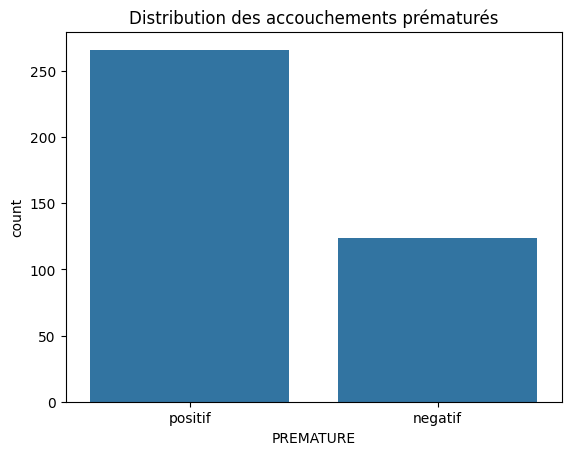

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


print("Valeurs de PREMATURE:", df["PREMATURE"].unique())


sns.countplot(x="PREMATURE", data=df)
plt.title("Distribution des accouchements prématurés")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation features (X) et target (y)
X = df.drop("PREMATURE", axis=1)
y = df["PREMATURE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

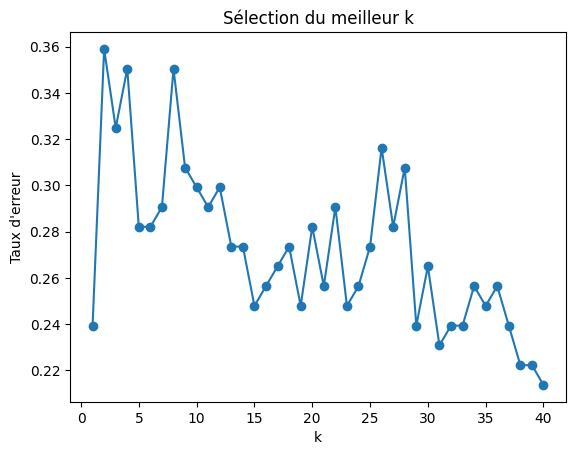

In [ ]:
from sklearn.metrics import accuracy_score

error_rates = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, pred))  

# Plot
plt.plot(range(1, 41), error_rates, marker='o')
plt.xlabel("k")
plt.ylabel("Taux d'erreur")
plt.title("Sélection du meilleur k")
plt.show()

In [11]:
best_k = error_rates.index(min(error_rates)) + 1  # k optimal
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

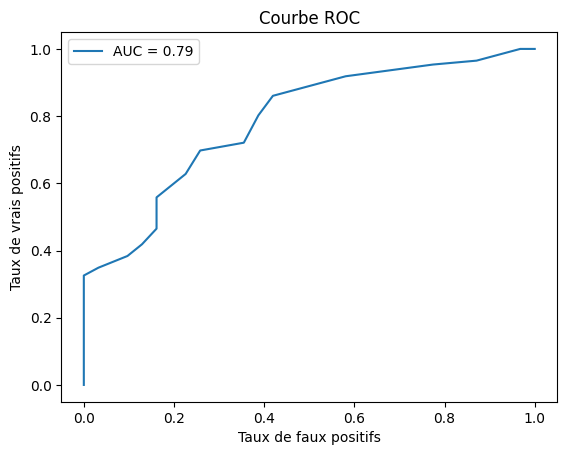

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  
y_train_encoded = le.transform(y_train) 

knn.fit(X_train_scaled, y_train_encoded)


y_prob = knn.predict_proba(X_test_scaled)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()